In [55]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [56]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import warnings
seed = 42

In [57]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [58]:
train = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\train.csv", index_col=0)
test = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\test.csv", index_col=0)
df = pd.concat([train,test])
df

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0.0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1.0
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0.0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0.0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-3.1726e-04,19.3361,18.3933,18.0860,17.9861,17.9670,17,17,1.1858,1.1863,1.1855,1.1857,1.1861,NaN
399996,21.5229,20.7283,20.6087,21.0049,20.8458,6.5455e-02,21.3993,20.6399,20.5451,20.9507,20.7827,8,4,1.2850,1.2908,1.2793,1.2821,1.2878,NaN
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-8.4180e-04,18.9136,17.8753,17.9047,18.0043,18.0400,1,1,1.1885,1.1886,1.1885,1.1885,1.1885,NaN


In [59]:
# traid의 데이터 개요
train.describe()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
count,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,3.2000e+05,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000,320000.0000
mean,19.8524,18.3768,17.7358,17.1742,16.8752,5.8308e-02,19.6289,18.2271,17.6154,17.1523,16.8693,6.3327,6.1388,1.1758,1.1765,1.1751,1.1754,1.1761,1.1163
std,1.9455,31.1108,1.4662,52.5615,57.1463,5.7546e-01,1.9236,17.7866,1.4730,25.0758,35.4365,8.8811,8.5516,0.1163,0.1181,0.1147,0.1155,0.1172,0.9235
min,-17.6875,-17555.3656,7.7314,-23955.8178,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,1.0000,1.0000,1.0001,1.0000,1.0002,1.0001,1.0000,0.0000
25%,18.7242,17.4749,16.8772,16.5239,16.2889,3.5580e-05,18.5636,17.3484,16.7871,16.4530,16.2341,1.0000,1.0000,1.0882,1.0884,1.0878,1.0880,1.0883,0.0000
50%,19.4194,18.1405,17.5258,17.1497,16.9176,4.7129e-02,19.2646,18.0224,17.4434,17.0874,16.8694,2.0000,2.0000,1.1793,1.1792,1.1794,1.1794,1.1793,1.0000
75%,20.4321,19.0732,18.4281,18.0074,17.7289,9.4597e-02,20.1976,18.8884,18.2911,17.9070,17.6557,5.0000,5.0000,1.2275,1.2260,1.2292,1.2286,1.2268,2.0000
max,58.6233,46.3383,72.0097,50.1641,52.6127,6.2323e+01,30.7779,30.6132,31.9572,32.0162,30.7813,44.0000,42.0000,2.0508,2.0803,2.0221,2.0363,2.0654,2.0000


In [60]:
# 각 칼럼들의 속성
train.dtypes

u            float64
g            float64
r            float64
i            float64
z            float64
redshift     float64
dered_u      float64
dered_g      float64
dered_r      float64
dered_i      float64
dered_z      float64
nObserve       int64
nDetect        int64
airmass_u    float64
airmass_g    float64
airmass_r    float64
airmass_i    float64
airmass_z    float64
class          int64
dtype: object

In [61]:
# class의 분포
train["class"].value_counts()

2    157219
0    119996
1     42785
Name: class, dtype: int64

In [62]:
# 데이터의 0~100%까지 1%단위로 데이터 분포%를 보여준다.
train['dered_g'].quantile(np.arange(0, 1, .01))  

0.00   -9999.0000
0.01      14.7309
0.02      15.3278
0.03      15.6326
0.04      15.8363
          ...    
0.95      21.5531
0.96      21.8826
0.97      22.2896
0.98      22.6834
0.99      23.3452
Name: dered_g, Length: 100, dtype: float64

In [63]:
train[train['dered_g'] < 0]

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
75409,24.0610,23.8879,20.5890,18.1014,16.4314,1.6993e-04,-30.6337,-18.6560,-8.7560,-3.6973,0.2159,11,8,1.1858,1.1859,1.1859,1.1858,1.1858,0
118439,22.3044,19.3714,16.9001,15.7479,14.6305,1.0708e-04,-5.9384,-2.5910,1.7079,4.4584,6.2330,1,1,1.0036,1.0039,1.0033,1.0034,1.0037,1
173287,19.9833,-17555.3656,17.9093,-17555.3656,-17555.3656,9.3168e-02,19.7719,-9999.0000,17.8146,-9999.0000,-9999.0000,5,4,1.3061,1.3121,1.3002,1.3031,1.3090,1
188816,25.5939,23.6192,20.5074,18.8486,17.8234,8.4770e-05,-22.2040,-13.1527,-4.7775,0.0710,3.8435,10,8,1.1866,1.1867,1.1866,1.1866,1.1866,0
203328,19.1628,17.7936,16.2919,15.1547,14.2541,2.1426e-04,-35.8185,-25.0458,-13.3443,-6.8683,-2.1271,10,9,1.2710,1.2660,1.2762,1.2735,1.2685,0
218728,22.2886,19.7721,17.6775,16.3672,15.1206,1.6016e-04,-41.0768,-29.4654,-16.3802,-8.9412,-3.7059,6,4,1.1851,1.1852,1.1852,1.1851,1.1852,0
294574,22.7283,20.9049,19.4225,17.8771,17.0411,-7.0816e-06,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0
295627,23.5286,20.9588,19.4514,17.8901,17.0632,-2.0197e-05,-42.8375,-30.3208,-16.0172,-8.4604,-2.5462,5,3,1.2579,1.2533,1.2627,1.2603,1.2556,0
299513,21.6222,19.0888,17.5501,16.3079,15.6535,1.8279e-04,-3.3025,-0.2617,4.1643,6.3602,8.2514,6,5,1.1898,1.1898,1.1898,1.1898,1.1898,0


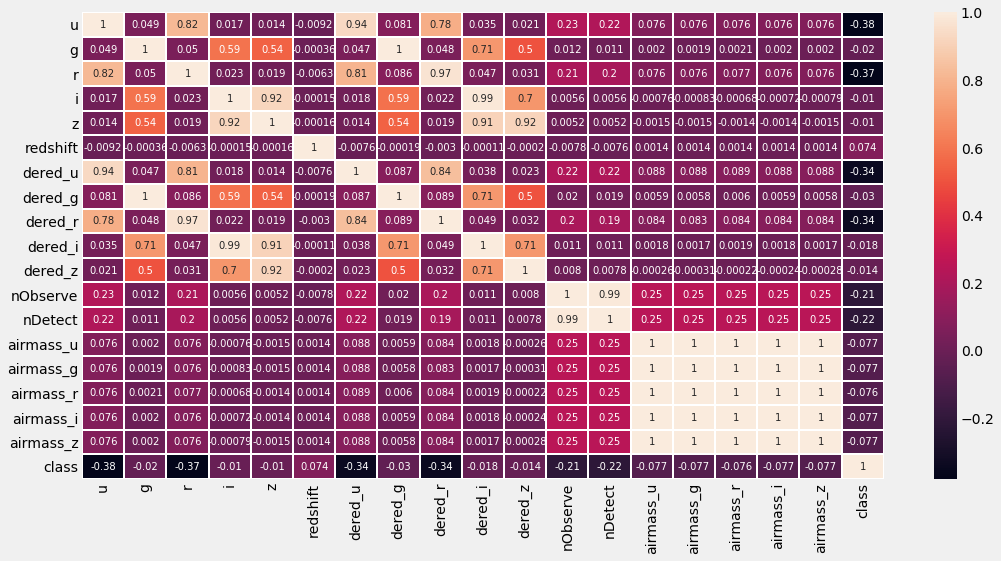

In [73]:
sns.heatmap(train.corr(), annot= True, linewidths = 1, annot_kws = {"size":10})

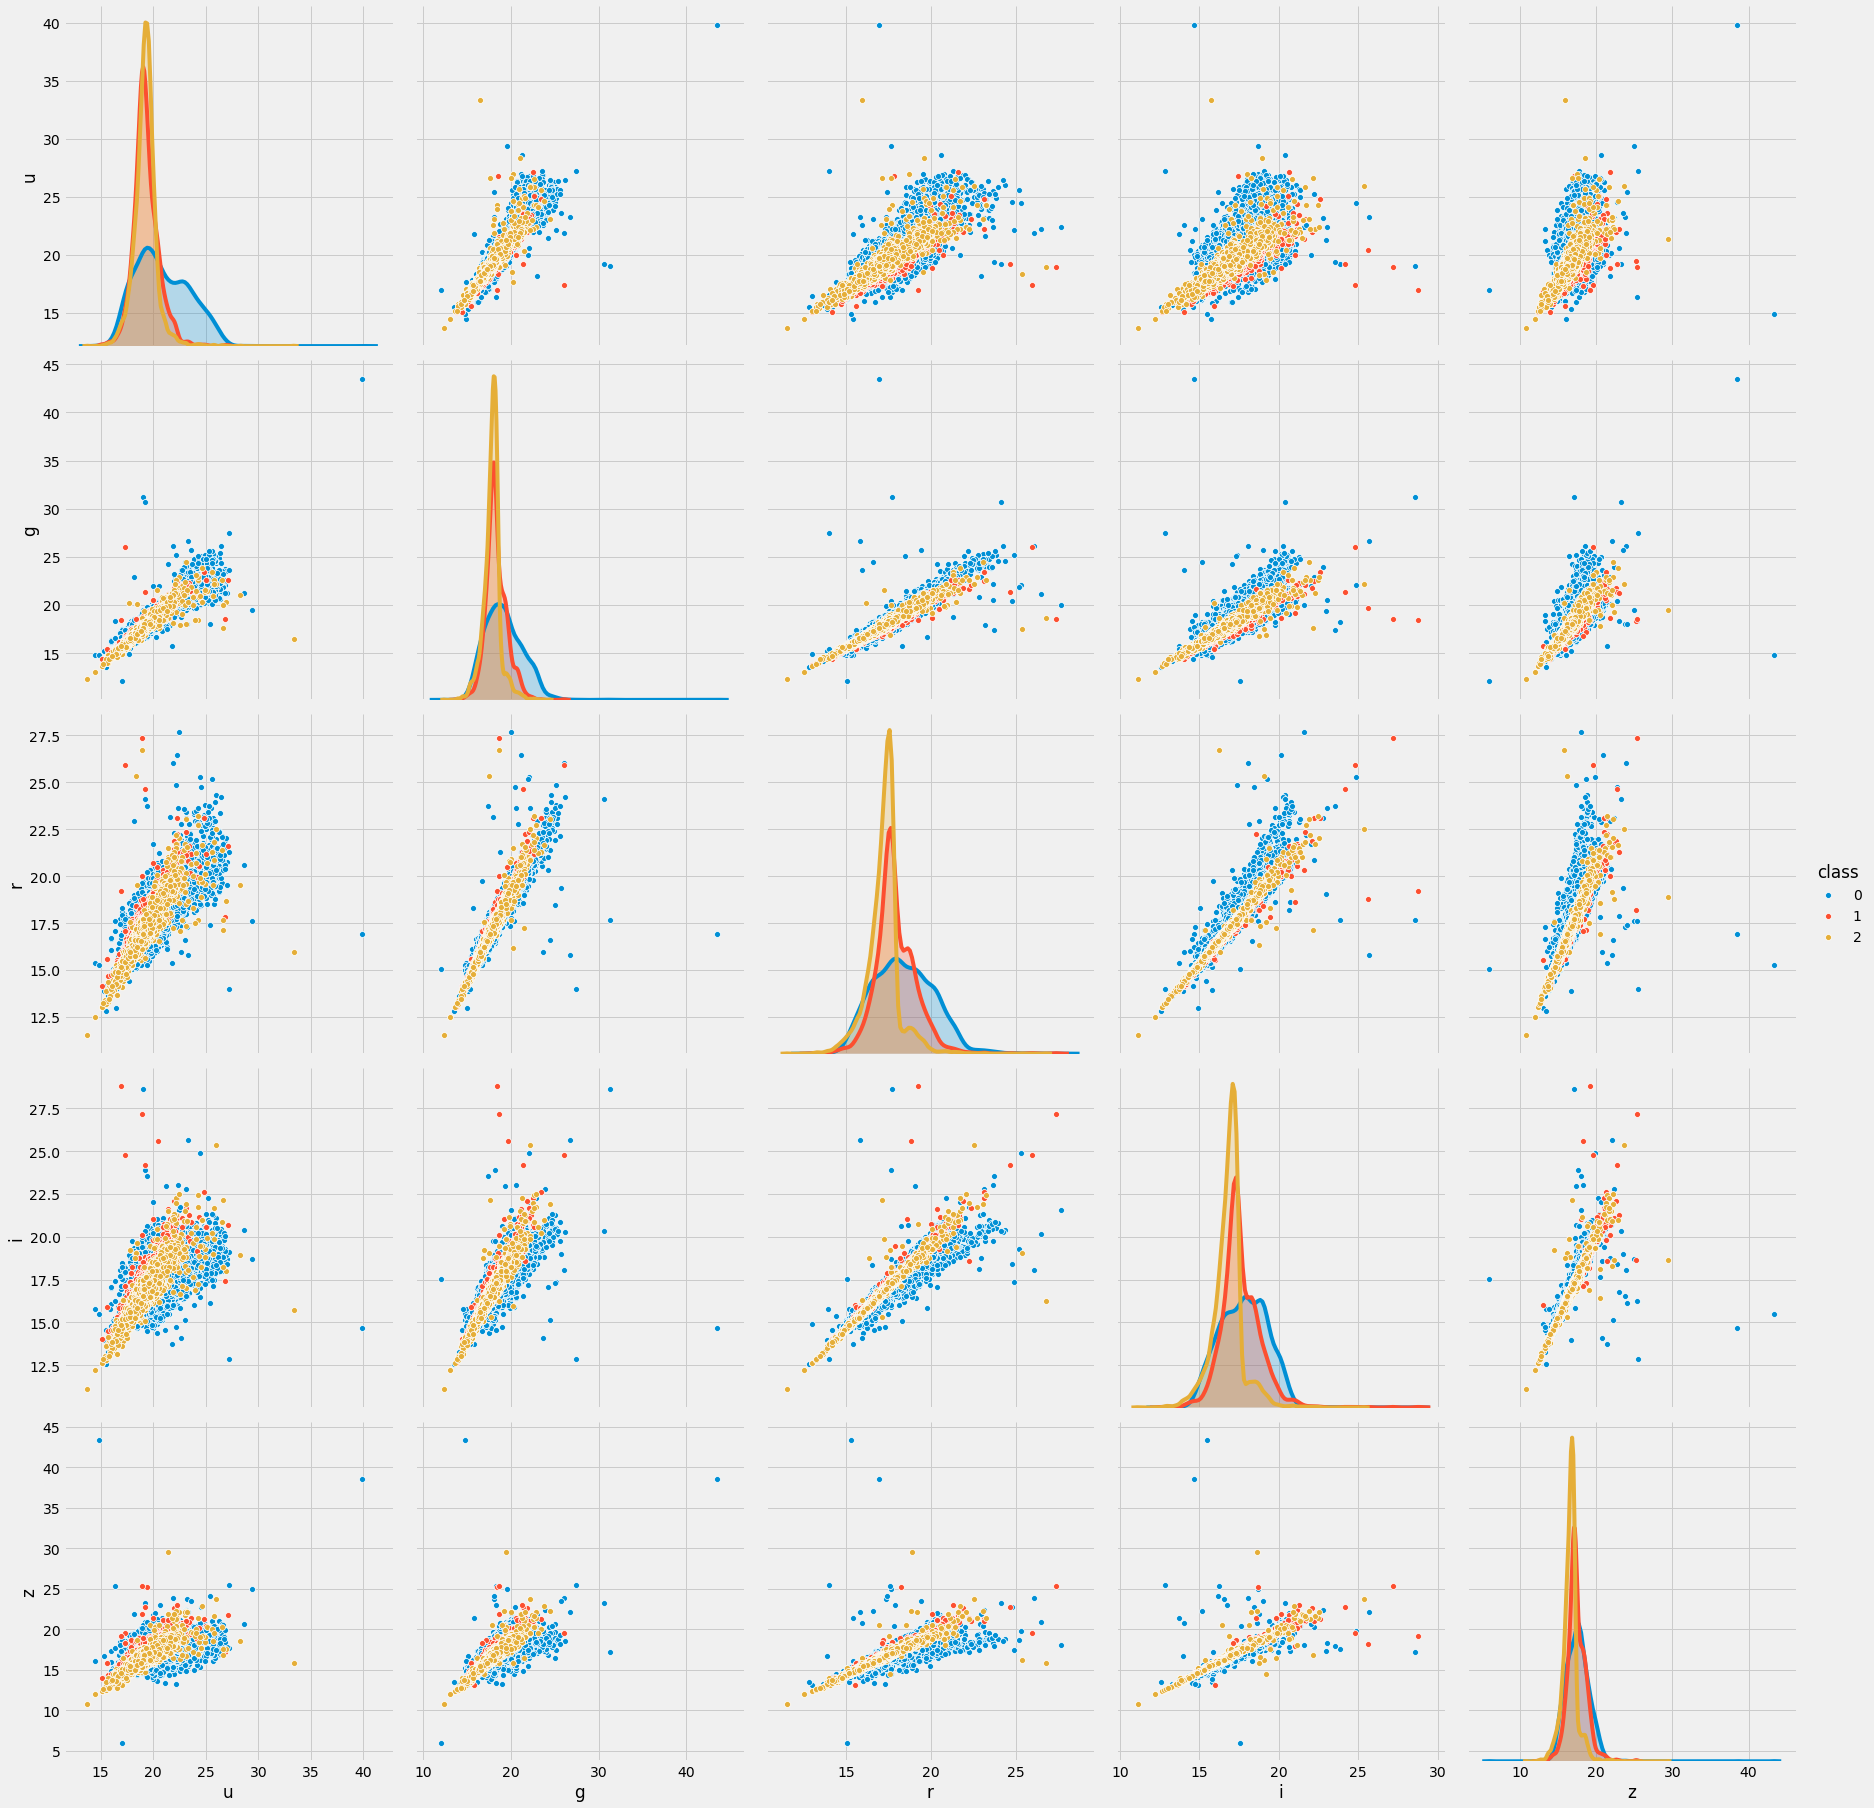

In [65]:
# 시각화
sample = train.sample(n=10000, random_state=seed)
sns.pairplot(data=sample, vars=['u', 'g', 'r', 'i', 'z'], hue='class', size=5)

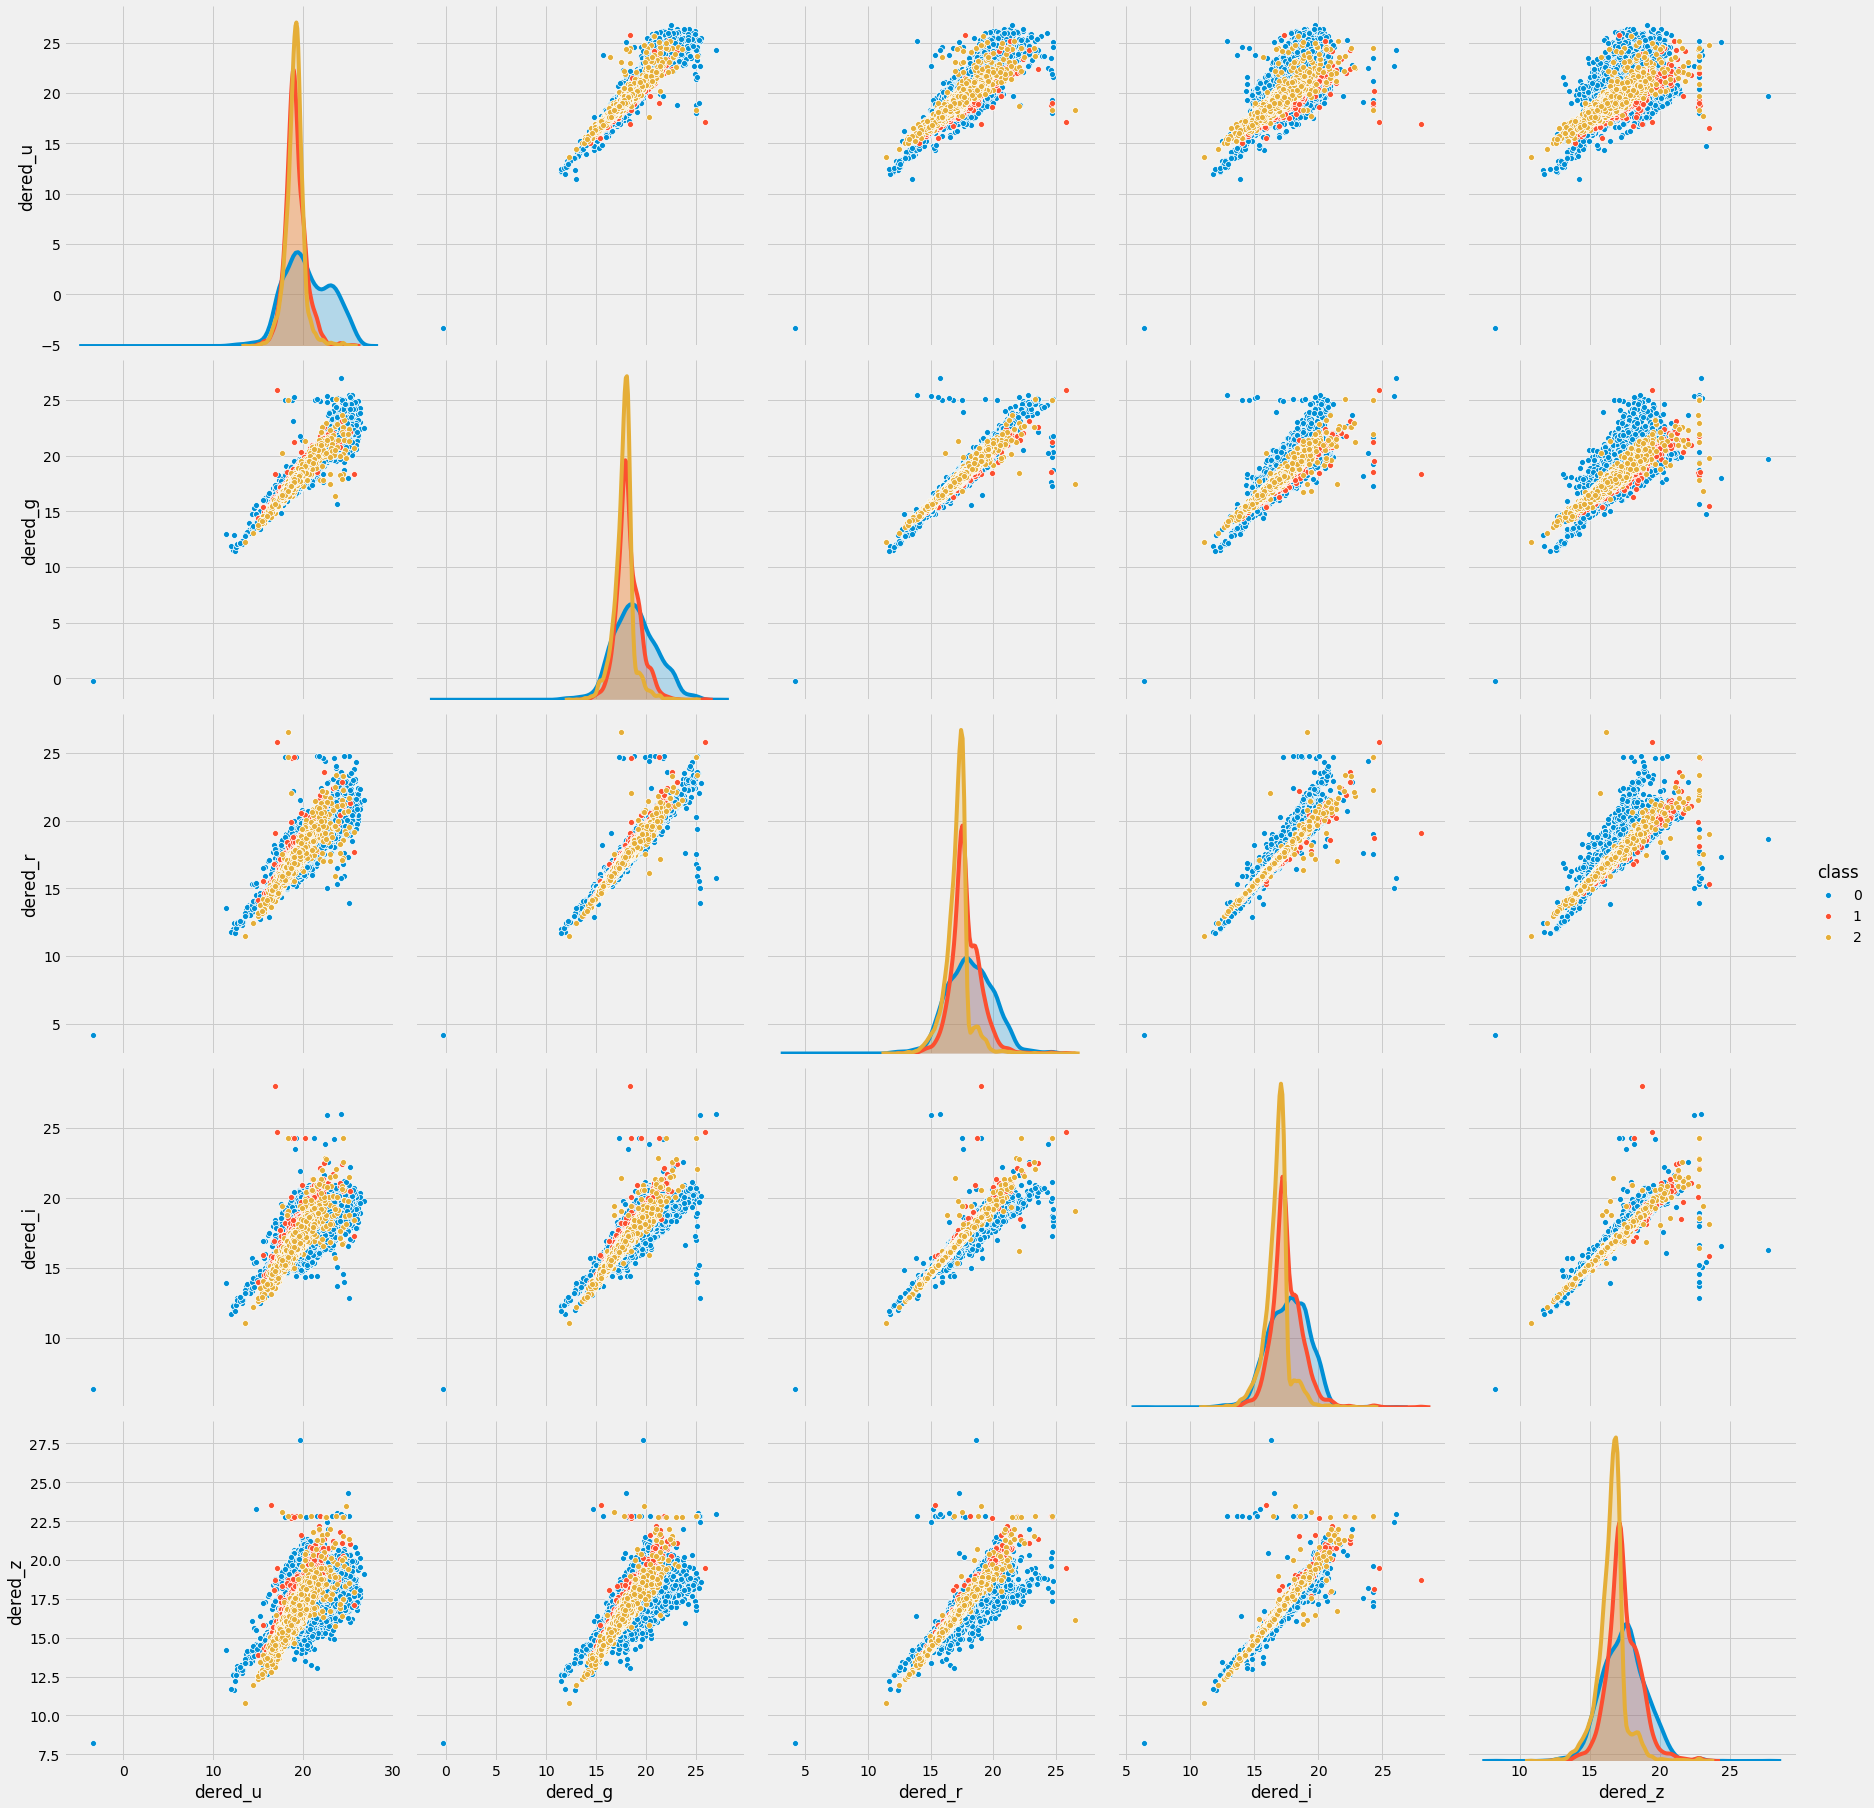

In [66]:
sns.pairplot(data=sample, vars=['dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z'], hue='class', size=5)

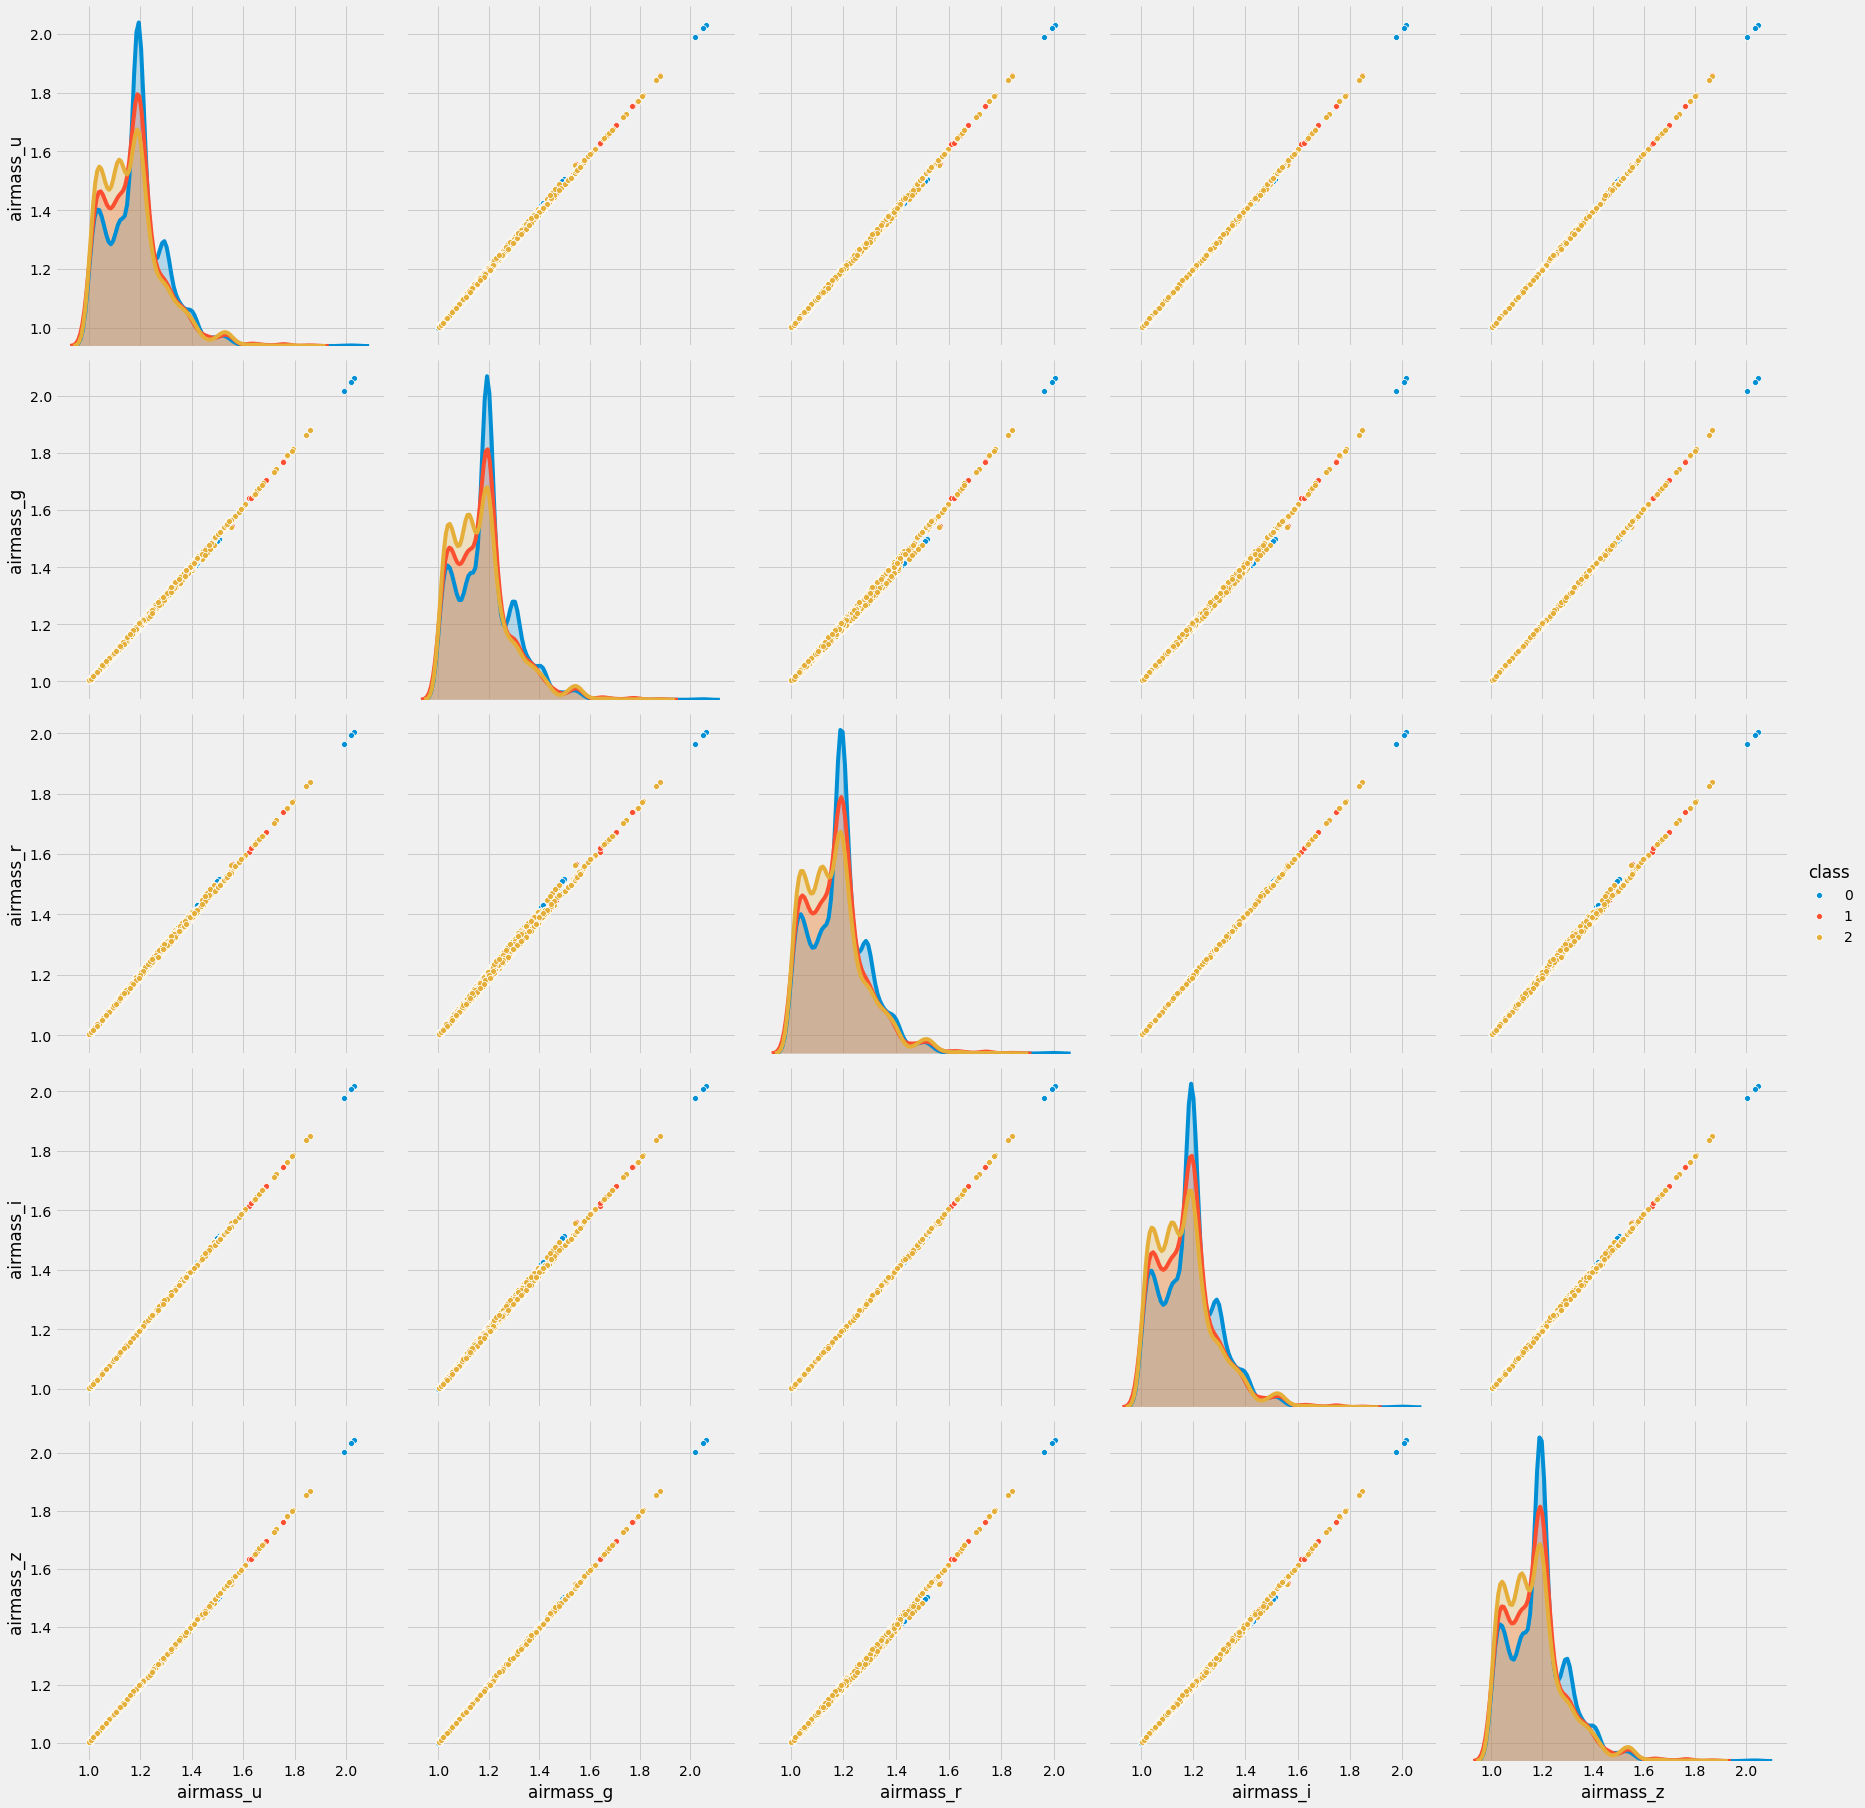

In [67]:
sns.pairplot(data=sample, vars=['airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z'], hue='class', size=5)

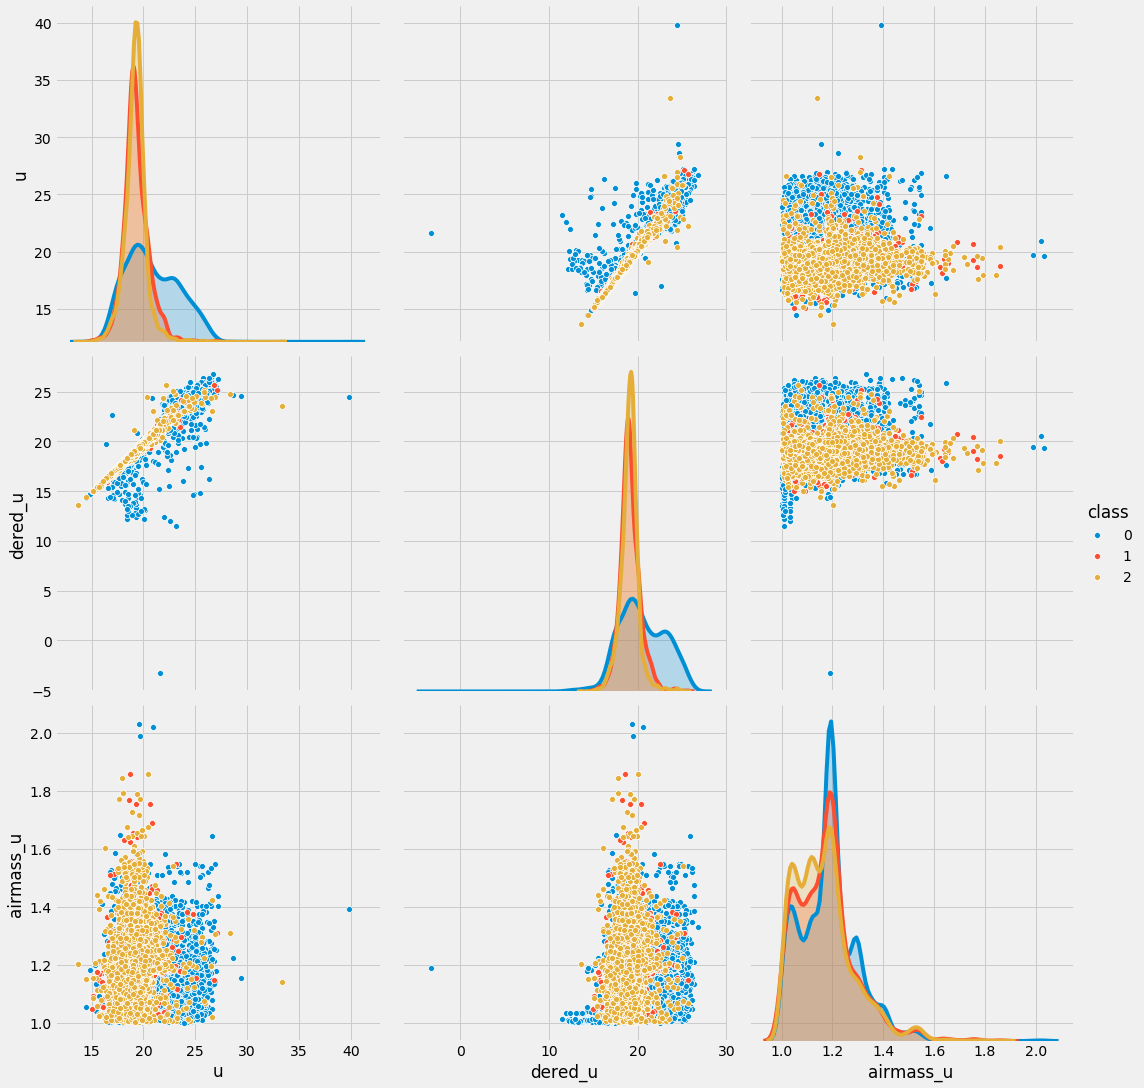

In [68]:
sns.pairplot(data=trn_sample, vars=['u', 'dered_u', 'airmass_u'], hue='class', size=5)

In [69]:
train.groupby('class').mean()

,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z
class,,,,,,,,,,,,,,,,,,
0,20.8648,19.2129,18.3938,17.8377,17.5528,-0.0024,20.5223,18.9474,18.2100,17.7011,17.4511,8.5553,8.3138,1.1864,1.1873,1.1856,1.1860,1.1868
1,19.2710,17.8776,17.8412,17.1333,17.0058,0.1055,19.1071,17.9267,17.7526,17.2447,17.1343,7.0451,6.7588,1.1776,1.1784,1.1770,1.1773,1.1780
2,19.2380,17.8746,17.2048,16.6790,16.3225,0.0918,19.0890,17.7590,17.1243,16.7084,16.3531,4.4425,4.3101,1.1671,1.1678,1.1666,1.1669,1.1674


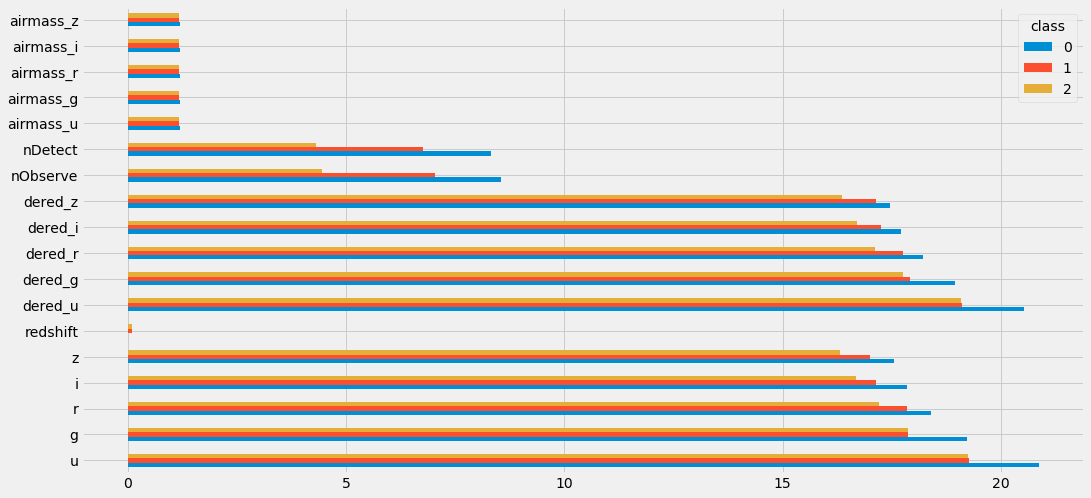

In [70]:
train.groupby('class').mean().T.plot(kind='barh')

In [71]:
df['d_dered_u'] = df['dered_u'] - df['u']
df['d_dered_g'] = df['dered_g'] - df['g']
df['d_dered_r'] = df['dered_r'] - df['r']
df['d_dered_i'] = df['dered_i'] - df['i']
df['d_dered_z'] = df['dered_z'] - df['z']
df['d_dered_rg'] = df['dered_r'] - df['dered_g']
df['d_dered_ig'] = df['dered_i'] - df['dered_g']
df['d_dered_zg'] = df['dered_z'] - df['dered_g']
df['d_dered_ri'] = df['dered_r'] - df['dered_i']
df['d_dered_rz'] = df['dered_r'] - df['dered_z']
df['d_dered_iz'] = df['dered_i'] - df['dered_z']
df['d_obs_det'] = df['nObserve'] - df['nDetect']
df["nObserve"] = np.log1p(df["nObserve"])
df


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_rg,d_dered_ig,d_dered_zg,d_dered_ri,d_dered_rz,d_dered_iz,d_obs_det
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,18,1.1898,1.1907,1.1890,1.1894,1.1902,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-1.3027,-2.6257,-3.3488,1.3230,2.0462,0.7232,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1,1.2533,1.2578,1.2488,1.2510,1.2555,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.5931,-0.7683,-0.8698,0.1751,0.2767,0.1016,0
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,2,1.0225,1.0241,1.0210,1.0217,1.0233,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.2466,-0.3649,-0.3905,0.1183,0.1440,0.0257,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,3,1.2054,1.2061,1.2049,1.2051,1.2057,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-0.9074,-1.2000,-1.4395,0.2926,0.5321,0.2395,1
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,12,1.1939,1.1943,1.1937,1.1938,1.1941,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-1.5709,-2.2436,-2.5579,0.6727,0.9871,0.3144,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,19.6734,18.6617,18.2708,18.1225,18.0627,-3.1726e-04,19.3361,18.3933,18.0860,17.9861,17.9670,2.8904,17,1.1858,1.1863,1.1855,1.1857,1.1861,NaN,-0.3372,-0.2684,-0.1848,-0.1364,-0.0957,-0.3073,-0.4072,-0.4263,0.0999,0.1190,0.0191,0
399996,21.5229,20.7283,20.6087,21.0049,20.8458,6.5455e-02,21.3993,20.6399,20.5451,20.9507,20.7827,2.1972,4,1.2850,1.2908,1.2793,1.2821,1.2878,NaN,-0.1235,-0.0884,-0.0636,-0.0542,-0.0631,-0.0949,0.3108,0.1428,-0.4056,-0.2376,0.1680,4
399997,19.3991,18.2411,18.1605,18.1978,18.2018,-8.4180e-04,18.9136,17.8753,17.9047,18.0043,18.0400,0.6931,1,1.1885,1.1886,1.1885,1.1885,1.1885,NaN,-0.4855,-0.3657,-0.2558,-0.1935,-0.1618,0.0294,0.1289,0.1647,-0.0996,-0.1353,-0.0357,0


In [72]:
df.drop(['airmass_z', 'airmass_i', 'airmass_r', 'airmass_g', 'u', 'g', 'r', 'i', 'nDetect', 'd_dered_rg', 'd_dered_ri',"id","airmass_u","class"], 
        axis=1, inplace=True)
print(df.shape)
df.head()

KeyError: "['id'] not found in axis"

In [ ]:
sub = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\sample_submission.csv")
sub

In [ ]:
sub["class"] = result.argmax(1)
sub

In [ ]:
sub.to_csv("dk_dacon2.csv", index=False)